# Import modules

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize centroids random or in_pixels

In [2]:
def kmeans_init_centers(img_1d, k_clusters, init_centroids):
    # if centroid is a random pixels of original image we will pick k_clusters pixels in img_1d 
    if init_centroids == 'in_pixels':
        return img_1d[np.random.choice(img_1d.shape[0], k_clusters, replace=False)]
    # if centroid has `c` channels, with `c` is initial random in [0,255]
    # then we will pick k_clusters tuple of img_1d.shape[1] values in range(256)
    if init_centroids == 'random':
        return np.random.choice(256, size = (k_clusters, img_1d.shape[1]), replace=False)

# Calculate Euclidean distance between 2 points

$$ d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$

In [3]:
def calEuclideanDistance(pA, pB):
    dist_square = np.sum((pA - pB) ** 2, axis=1)
    return np.sqrt(dist_square)

# Assign labels of cluster indices to which each pixels belong

In [4]:
def kmeans_assign_labels(img_1d, centroid):
    distances = []
    for c in centroid:
        # Distance between each elements in img_1d vs centroid[i] in Euclidean distance
        distance = calEuclideanDistance(img_1d, c)
        distances.append(distance)
    # convert list to np.ndarray
    distances = np.array(distances)
    # Return the indices of clusters which each pixels with minimum distances to all centroids belong to
    return np.argmin(distances.T, axis = 1)

# Update centroids to get the centroids close to the center of cluster

In [5]:
def kmeans_update_centers(img_1d, label, k_clusters, num_channels):
    centroids = np.zeros((k_clusters, num_channels))
    for k in range(k_clusters):
        labelOfPoints = label == k
        centroid_k = img_1d[labelOfPoints, :]
        # Take average of all datapoints belong to cluster k
        if len(centroid_k) != 0:
            centroids[k, :] = np.mean(centroid_k, axis = 0) 
        else: continue
    return centroids

# Check if the new centroids are close to previous centroids

In [6]:
def has_converged(centers, new_centers):
    # if we have absolute(centers[i] - new_centers[i]) <= atol(=1) => the difference of two RGBs are less than 1
    # we can approve these both RGBs are the same.
    return np.allclose(centers, new_centers, atol = 1)

# KMeans algorithm which return centroids and labels of each pixels

In [7]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    # Get 3 dimensions (height, width, num_channels) information of image
    height = img_1d.shape[0]
    width = img_1d.shape[1]
    num_channels = img_1d.shape[2]
    # Because the original image_array have 3 dimensions so we have to reshape it to 2 dimensions
    img_1d = img_1d.reshape(height * width, num_channels)
    # Create k_clusters centroids with init_centroids = 'random' or 'in_pixels'
    centroids = [kmeans_init_centers(img_1d, k_clusters, init_centroids)]
    labels = []
    while max_iter:
        labels.append(kmeans_assign_labels(img_1d, centroids[-1]))
        new_centroids = kmeans_update_centers(img_1d, labels[-1], k_clusters, num_channels)
        if has_converged(centroids[-1], new_centroids): break
        centroids.append(new_centroids)
        max_iter -= 1
    return (centroids, labels)

# Get new image array with new centroids and labels of each pixels

In [8]:
def get_new_image(img_1d, k_clusters, centroid, label):
    # Get 3 dimensions (height, width, num_channels) information of image
    height = image_array.shape[0]
    width = image_array.shape[1]
    num_channels = image_array.shape[2]
    # Because the original image_array have 3 dimensions so we have to reshape it to 2 dimensions
    img_1d = img_1d.reshape(height * width, num_channels)
    # Initialize new image array with 0 and then adding the cluster index (=centroid[k]) to each pixels
    new_img = np.zeros((img_1d.shape[0], img_1d.shape[1]))
    # Get the new image array with k_clusters centroids assigned to each pixels.
    for k in range(k_clusters):
        new_img[label == k, :] += centroid[k]
    new_img = new_img.reshape(height, width, num_channels)
    return new_img

# Main function

Please enter name of image: img.jpg
My new centroids:
[[154.25098264  71.38733724 236.58341369]
 [190.91144151  33.68758313  83.86186058]
 [ 88.00950071  42.07606427 184.8260309 ]
 [216.98585693 113.4261451  245.04371184]
 [ 46.59358744  26.38903739  59.85397937]
 [250.75243797 137.07977651 119.05777275]
 [242.74205327 209.93925222 239.47166616]]

My new labels:
[3 3 3 ... 6 6 6]


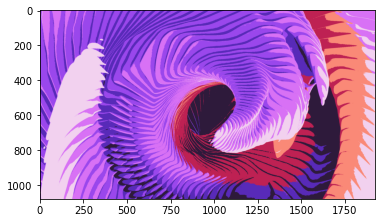


Please enter image format you want to export (0 for .png, 1 for .pdf): 1

Sklearn centroid:
 [[214.80672576 110.90651762 244.7791835 ]
 [188.20019256  32.19658732  84.24964964]
 [ 84.84550239  40.77940424 180.35044748]
 [242.70645544 208.33447862 238.88828772]
 [250.6891642  134.3522698  116.17787354]
 [ 45.37386589  26.24445252  57.33711496]
 [150.78475293  69.92127439 235.55118058]]

Sklearn labels:
 [0 0 0 ... 3 3 3]


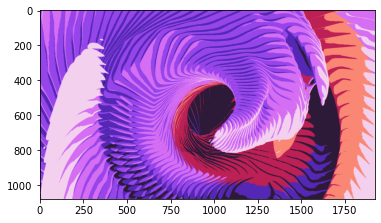

In [9]:
if __name__ == '__main__':
    image_name = input('Please enter name of image: ')
    image = Image.open(image_name)
    image_array = np.array(image)
    k_clusters = 7
    max_iter = 1000
    init_centroids = 'in_pixels'
    (centroids, labels) = kmeans(image_array, k_clusters, max_iter, init_centroids)
    
    print('My new centroids:')
    print(centroids[-1])
    print('\nMy new labels:')
    print(labels[-1])
    new_img = get_new_image(image_array, k_clusters, centroids[-1], labels[-1])
    
    # Use imshow in matplotlib.plot module
    plt.imshow(new_img.astype('uint8'))
    fig1 = plt.gcf()
    plt.show()
    image_name = image_name.split('.')
    export_type = int(input('\nPlease enter image format you want to export (0 for .png, 1 for .pdf): '))
    if export_type == 0:
        fig1.savefig(image_name[0] + '.png')
    if export_type == 1:
        fig1.savefig(image_name[0] + '.pdf')

    tmp = image_array.copy()
    tmp = tmp.reshape(tmp.shape[0] * tmp.shape[1], tmp.shape[2])
    test_data = KMeans(n_clusters = k_clusters, random_state=0).fit(tmp)
    print('\nSklearn centroid:\n', test_data.cluster_centers_ )
    print('\nSklearn labels:\n', test_data.labels_ )
    new_img_test = get_new_image(image_array, k_clusters, test_data.cluster_centers_, test_data.labels_)
    plt.imshow(new_img_test.astype('uint8'))
    plt.show()